In [1]:
# IMPORTING THE REQUIRED LIBRARIES

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff

In [2]:
# DATA EXPLORATION BEGINS HERE
## Read file
data = pd.read_csv("googleplaystore.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Total No. of Apps in our DataSet
print(len(data))

print(data.shape)

10841
(10841, 13)


In [5]:
#Deleting Duplicate Apps
data.drop_duplicates(subset='App', inplace=True)
data = data[data['Android Ver'] != np.nan]
data = data[data['Android Ver'] != 'NaN']
data = data[data['Installs'] != 'Free']
data = data[data['Installs'] != 'Paid']
print(len(data))
# Total apps after deleting duplicates
print(data.shape)

9659
(9659, 13)


In [6]:
#Displaying all the Categories of Apps
cat = data.Category.unique()
print(cat)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


<AxesSubplot:xlabel='Category'>

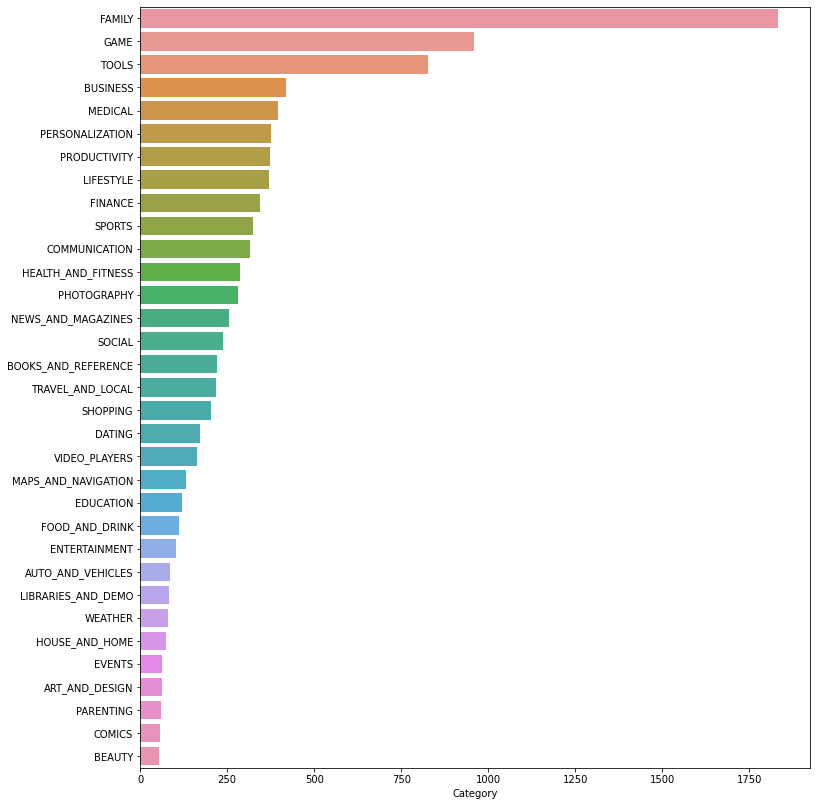

In [7]:
# Using Seaborn to plot a Bar Graph Representing No. Apps in Each Category
plt.figure(figsize=(12, 14))
most_cat = data.Category.value_counts()
sns.barplot(x=most_cat, y=most_cat.index, data=data)

In [8]:
# Displaying all the differernt Ratings
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [9]:
# Here, we can see there is a rating of '19.' which is not possible, So we will replace it with '1.9'
data['Rating'].replace(to_replace=[19.0], value=[1.9],inplace=True)
data.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [11]:
# We need to convert the certain columns from 'object' to numeric. So that plotting graphs becomes easier
data['Rating'] = pd.to_numeric(data['Rating'],errors='coerce')

In [12]:
# Displaying the values in column "INSTALL"
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [13]:
# Here, we need to Remove '+' and ',' and convert its dtype to numeric
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: x.replace('Free', '0') if 'Free' in str(x) else x)
data['Installs'] = data['Installs'].apply(lambda x: int(x))
data['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

In [14]:
# Displaying the values in column "Size", and Analysing it.
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [15]:
# Here, The sizes will be converted into Kilobytes. Those of which are equal to 'Varies with device' will be turned into 'NaN', because it may cause false fluctuations in Visualization.
""" data['Size'] = data['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

data['Size'] = data['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')/1000 if 'k' in str(x) else x))

data['Size'] = data['Size'].apply(lambda x: float(x))

data['Size'].unique() """

data['Size'].replace('Varies with device', np.nan, inplace = True ) 
data['Size']=data['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
data['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)
data['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+03, 2.50e+04, 2.80e+03, 5.60e+03,
       2.90e+04, 3.30e+04, 3.10e+03, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+03, 5.50e+03, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+03, 7.00e+03, 2.30e+04, 6.00e+03, 6.10e+03,
       4.60e+03, 9.20e+03, 5.20e+03, 1.10e+04, 2.40e+04,      nan,
       9.40e+03, 1.50e+04, 1.00e+04, 1.20e+03, 2.60e+04, 8.00e+03,
       7.90e+03, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+03, 5.70e+03, 8.60e+03, 2.40e+03, 2.70e+04, 2.50e+03,
       1.60e+04, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+04,
       3.20e+04, 5.40e+03, 1.80e+04, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+04, 9.00e+03, 6.70e+03, 3.00e+04, 2.60e+03,
       7.10e+03, 3.70e+03, 2.20e+04, 7.40e+03, 6.40e+03, 3.20e+03,
       8.20e+03, 9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03,
       1.30e+04, 7.30e+04, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03,
       7.20e+03, 2.10e+03, 4.20e+04, 7.30e+03, 9.10e+03, 5.50e

In [22]:
# Displaying the data in "PRICE" column, and analysing it.
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [22]:
# Here, The '$' sign has to be Removed. Those of which are equal to 'Everyone' will be turned into 'NaN', because it may cause false fluctuations in Visualization.
data['Price'] = data['Price'].apply(lambda x: str(x).replace('Everyone', 'NaN') if 'Everyone' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))

data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [32]:
# Displaying the data in "REVIEWS" column, and analysing it.
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [35]:
# Since, each App mostly has different amount of reviews, we'll leave them as it is adn convert it to dtype= 'int'
data['Reviews'] = pd.to_numeric(data['Reviews'],errors='coerce')

In [39]:
# Displaying the data in "Android Version" column, and analysing it.
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [40]:
# Here, we will try to make the Data more easy to read
data['Android Ver'].replace(to_replace=['4.4W and up','Varies with device'], value=['4.4','1.0'],inplace=True)
data['Android Ver'].replace({k: '1.0' for k in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
data['Android Ver'].replace({k: '2.0' for k in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
data['Android Ver'].replace({k: '3.0' for k in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
data['Android Ver'].replace({k: '4.0' for k in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
data['Android Ver'].replace({k: '5.0' for k in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
data['Android Ver'].replace({k: '6.0' for k in ['6.0 and up']},inplace=True)
data['Android Ver'].replace({k: '7.0' for k in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
data['Android Ver'].replace({k: '8.0' for k in ['8.0 and up']},inplace=True)
data['Android Ver'].fillna('1.0', inplace=True)

In [41]:
data['Android Ver'].unique()

# Now, the data is much easier to understand.

array(['4.0', '2.0', '3.0', '1.0', '5.0', '6.0', '7.0', '8.0'],
      dtype=object)

Text(0.5, 1.0, 'Total apps of each Category')

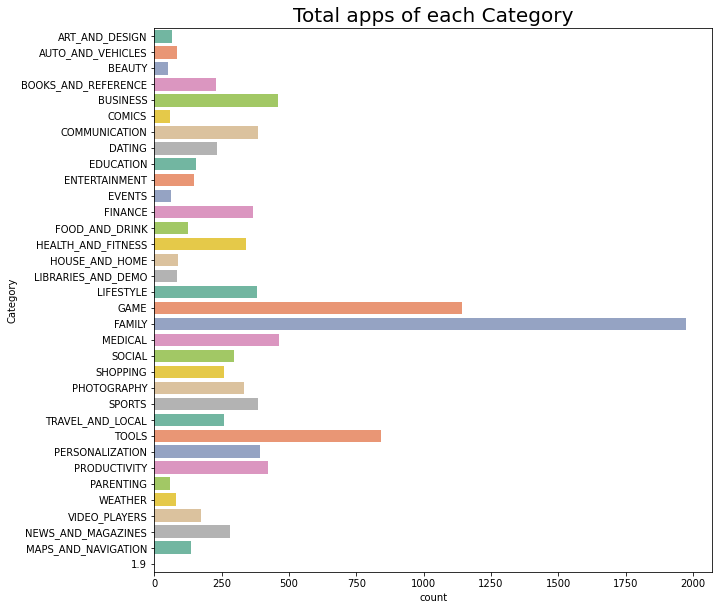

In [36]:
# DATA VISUALIZATION BEGINS NOW

# Total Apps In Each Category
plt.figure(figsize=(10,10))
g = sns.countplot(y="Category",data=data, palette = "Set2")
plt.title('Total apps of each Category',size = 20)

In [8]:
""" 
Android market breakdown
Which category has the highest share of (active) apps in the market? """
# This is another way of representing the above data in a Pie Graph using Plotly
number_of_apps_in_category = data['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
)]

plotly.offline.iplot(data, filename='active_category')

""" 
Observations :
Family and Game apps have the highest market prevelance.
Interestingly, Tools, Business and Medical apps are also catching up. 
"""

' \nObservations :\nFamily and Game apps have the highest market prevelance.\nInterestingly, Tools, Business and Medical apps are also catching up. \n'

' Observation : Communication and Social Categories have the most downloads/installs  '

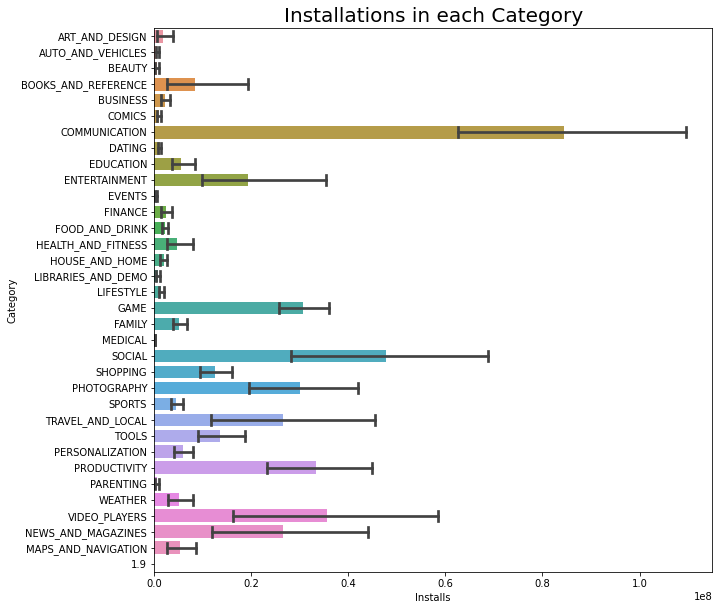

In [46]:
# Plotting Installs In Each Category

plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data, capsize=.6)
plt.title('Installations in each Category',size = 20)

""" Observation : Communication and Social Categories have the most downloads/installs  """

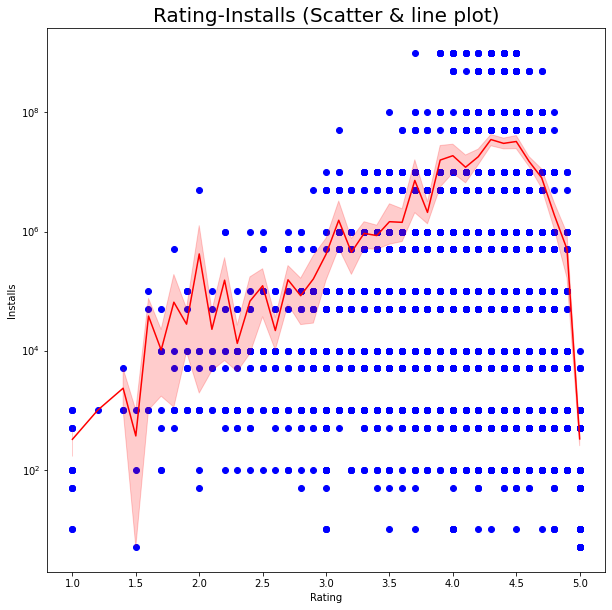

In [38]:
# PLotting Installs vs. Ratings Using Scatter and Line -Plot

plt.figure(figsize=(10,10))
plt.scatter( x=data['Rating'], y=data['Installs'] , color = 'blue')
g = sns.lineplot(x="Rating", y="Installs",color="red", data=data) 
plt.yscale('log')
plt.xlabel('Rating')
plt.ylabel('Installs')
plt.title('Rating-Installs (Scatter & line plot)',size = 20)
plt.show()

""" Observation : So it seems that a Rating between 2.8 and 4.8 is desirable. But over 4.8 the Installations drop significantly and that makes sense. Imagine a Youtube video with millions of views. There is no way to have 100% likes. But a video with only a few views (as many as youtuber's friends and relatives), is quite possible to have zero dislikes. That is what exactly happens with such high Ratings! """

Text(0.5, 1.0, 'Reviews-Installs ')

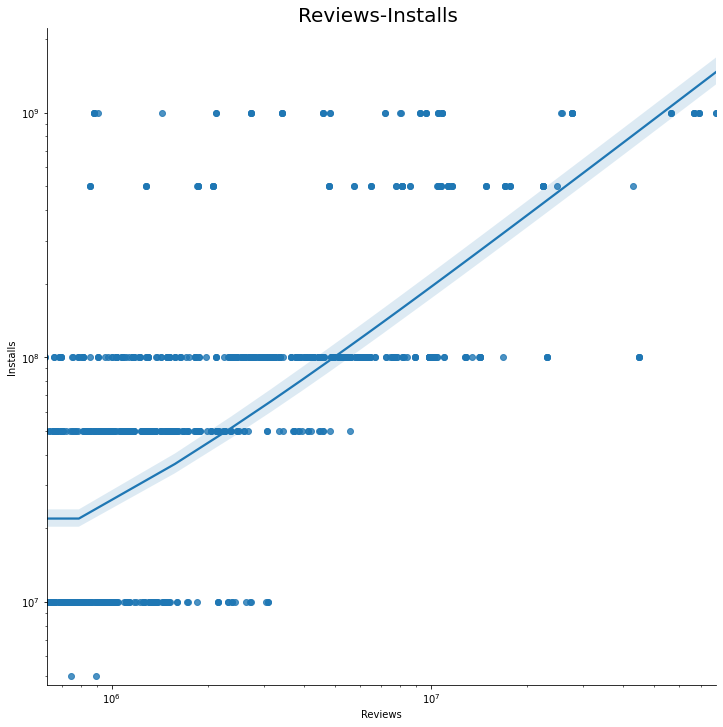

In [42]:
# Plotting Reviews vs. Installs, Here we'll see what is the relation between reviews and installs

g = sns.lmplot(y="Installs",x="Reviews", data=data,size=(10))
plt.xscale('log')
plt.yscale('log')
plt.title('Reviews-Installs ',size = 20)

""" 
Observation : The Reviews, unlike Rating, describe the Installs in a linear way. (ie. The Apps With the most No. of install generally has more No. of reviews) """

' Observation : After viewing this graph, we can conclude that the more Installs are increase, the Size increases as well. But why is that? One of the most appealing things in an app is its appearance. Realistic pictures, 3D models, dazzling animations and beautiful music make up for a more pleasant experience to the user. But all of the above seriously increase the size of the app . So this graph basically says: Your app has to be beautiful! '

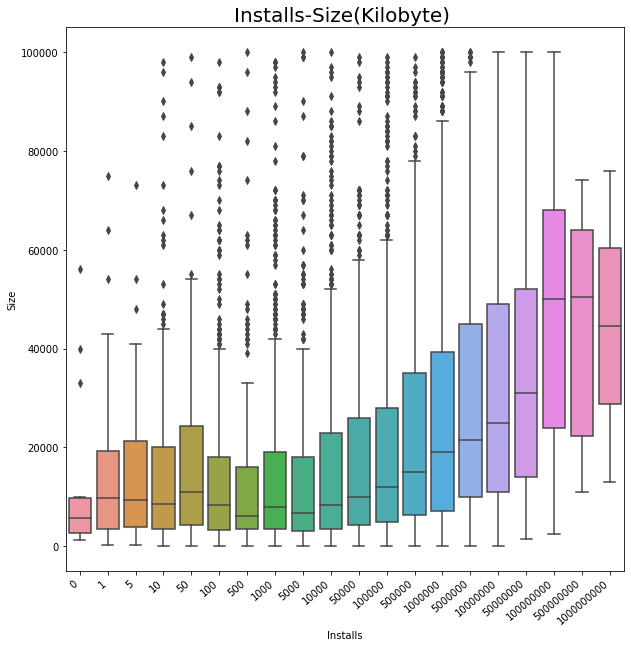

In [17]:
# Plotting Relationship between 'Installs' and 'Size'. Does Size of an App, matter?
# Here, size is in KiloBytes
plt.figure(figsize=(10,10))
g = sns.boxplot(x="Installs", y="Size", data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right")
plt.title('Installs-Size(Kilobyte) ',size = 20)

""" Observation : After viewing this graph, we can conclude that the more Installs are increase, the Size increases as well. But why is that? One of the most appealing things in an app is its appearance. Realistic pictures, 3D models, dazzling animations and beautiful music make up for a more pleasant experience to the user. But all of the above seriously increase the size of the app . So this graph basically says: Your app has to be beautiful! """

Text(0.5, 1.0, 'Content Rating-Installs')

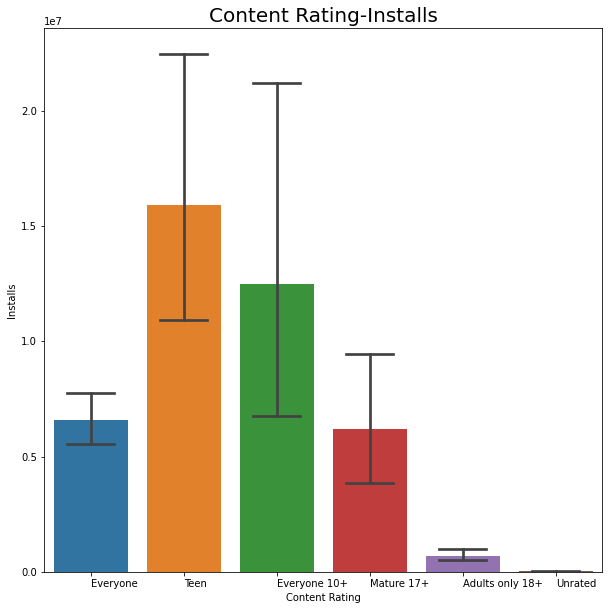

In [18]:
# Plotting Content Rating vs Installs 

plt.figure(figsize=(10,10))
ax = sns.barplot(y="Installs", x="Content Rating", data=data, capsize=.5)
ax.set_xticklabels(ax.get_xticklabels(),  ha="left")
plt.title('Content Rating-Installs',size = 20)

""" Observation : It is obvious that the applications which are permissible to children, have the most Downloads. """

' Observation : Most top rated apps are optimally priced between ~1 𝑡𝑜 30 . There are only a very few apps priced above 20$. '

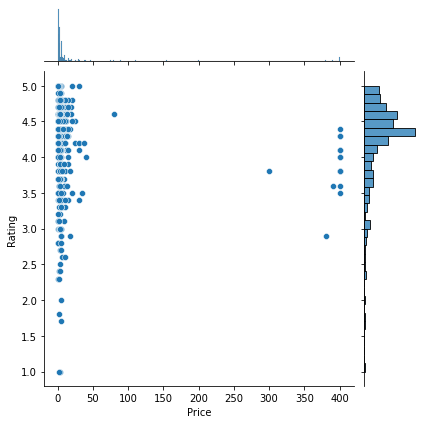

In [23]:
""" Pricing Strategy - Free Vs Paid?
How do app prices impact app rating? """

paid_apps = data[data.Price>0]
p = sns.jointplot( "Price", "Rating", paid_apps)

""" Observation : Most top rated apps are optimally priced between ~1 𝑡𝑜 30 . There are only a very few apps priced above 20$. 
                  Therefore, we can say that for an App to be more accessible to users has to be cheap/free. If any App that has a 
                  Price on it, then the App should be well worth it, and very useful to the User."""